In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow import keras
from keras import models
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.optimizers import RMSprop
from tensorflow.keras.datasets import imdb

1) Check out the Jupyter notebook for Chapter 3 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb. Then, use the "GraidentTape API" to find the derivative of the function f(x) = sin(x) for x = 0, 0.1, 0.2 and 0.3. Submit your Jupyter notebook that shows both the code and the result you got.

In [7]:
# Function definition
def f(x):
    return tf.sin(x)


# Points at which to calculate the derivative
x_values = [0, 0.1, 0.2, 0.3]

# Calculating the derivatives
derivatives = []
for x in x_values:
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y = f(x_tensor)
    dy_dx = tape.gradient(y, x_tensor)
    derivatives.append(dy_dx.numpy())

# Print the results
for x, derivative in zip(x_values, derivatives):
    print(f"f'({x}) = {derivative}")

f'(0) = 1.0
f'(0.1) = 0.9950041770935059
f'(0.2) = 0.9800665974617004
f'(0.3) = 0.9553365111351013


2) Check out the Jupyter notebook for Chapter 4 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb. Then, for the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets.

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5119 - accuracy: 0.7838 - val_loss: 0.3788 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3054 - accuracy: 0.8985 - val_loss: 0.3017 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2299 - accuracy: 0.9200 - val_loss: 0.2813 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1887 - accuracy: 0.9359 - val_loss: 0.2853 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1549 - accuracy: 0.9479 - val_loss: 0.2856 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1314 - accuracy: 0.9573 - val_loss: 0.2877 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1096 - accuracy: 0.9673 - val_loss: 0.3054 - val_accuracy: 0.8848
Epoch 8/20
30/30 [=

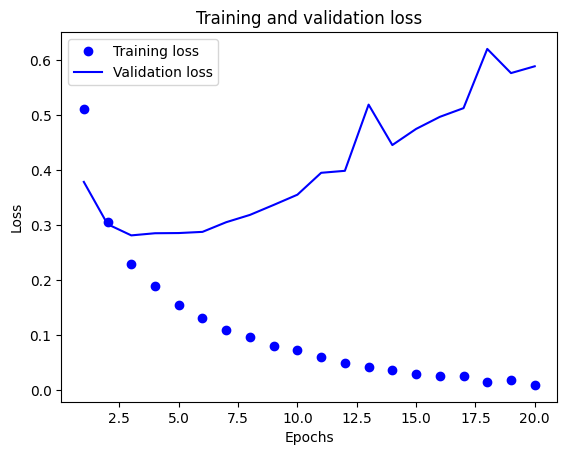

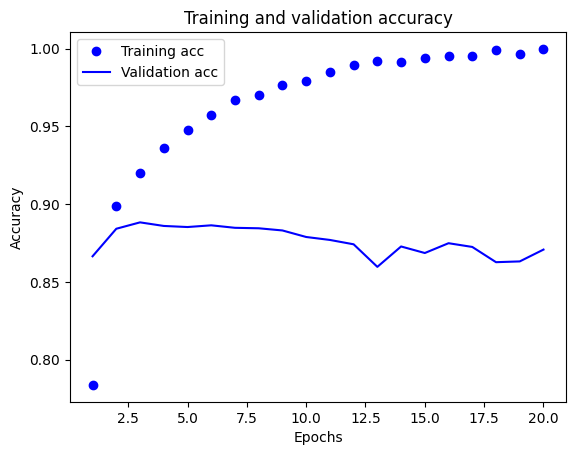

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
display(results)

[0.6321073770523071, 0.8574000000953674]

/scratch/user/cpepis/CSCE636/.venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
59/59 [==============================] - 2s 23ms/step - loss: 0.6868 - accuracy: 0.5453 - val_loss: 0.6666 - val_accuracy: 0.6764
Epoch 2/20
59/59 [==============================] - 0s 7ms/step - loss: 0.6337 - accuracy: 0.6827 - val_loss: 0.5862 - val_accuracy: 0.7887
Epoch 3/20
59/59 [==============================] - 0s 8ms/step - loss: 0.5588 - accuracy: 0.7596 - val_loss: 0.5058 - val_accuracy: 0.8342
Epoch 4/20
59/59 [==============================] - 1s 11ms/step - loss: 0.4860 - accuracy: 0.8123 - val_loss: 0.4379 - val_accuracy: 0.8520
Epoch 5/20
59/59 [==============================] - 1s 8ms/step - loss: 0.4271 - accuracy: 0.8405 - val_loss: 0.3875 - val_accuracy: 0.8658
Epoch 6/20
59/59 [==============================] - 0s 8ms/step - loss: 0.3784 - accuracy: 0.8655 - val_loss: 0.3512 - val_accuracy: 0.8747
Epoch 7/20
59/59 [==============================] - 0s 8ms/step - loss: 0.3402 - accuracy: 0.8807 - val_loss: 0.3265 - val_accuracy: 0.8803
Epoch 8/20
59/59 [

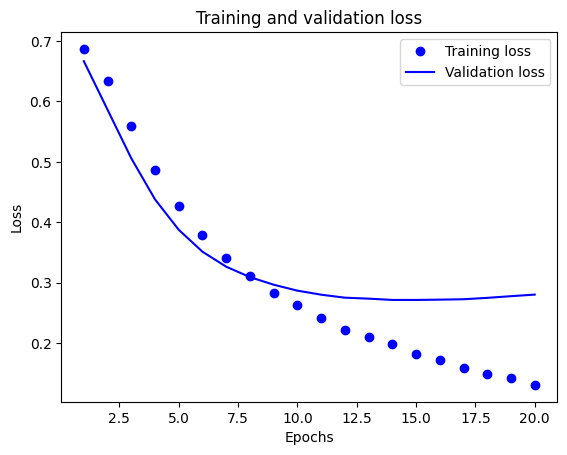

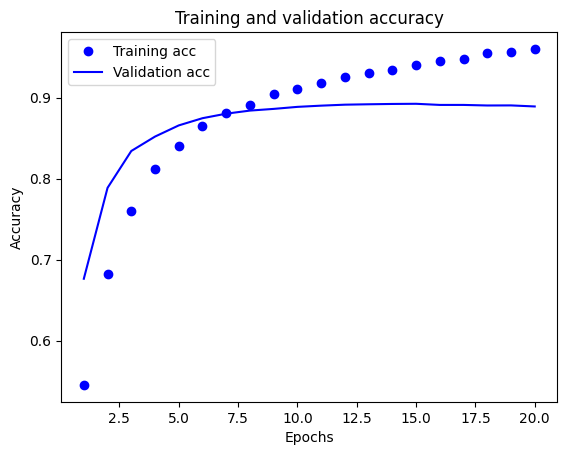

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

model = models.Sequential(
    [
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid"),
    ]
)

optimizer = Adam(
    lr=0.0001,  # Learning rate
    beta_1=0.9,  # Decay rate for first moment estimate
    beta_2=0.999,  # Decay rate for second moment estimate
    epsilon=1e-7,  # Numerical stability
)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_val, y_val),
)
results = model.evaluate(x_test, y_test)

history_dict = history.history

# Plotting training and validation loss
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
display(results)

[0.2991522550582886, 0.8824800252914429]